In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
import nltk 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize, word_tokenize
import re
#from googletrans import Translator
nltk.download('words')
from nltk.corpus import words 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from sklearn.cluster import MiniBatchKMeans
#!pip install -q wordcloud
#!pip install -q kmeans
import wordcloud


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pratishtha.kapoor\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package words is already up-to-date!


In [2]:
df = pd.read_csv('problem_statement_3.csv')

In [3]:
df.head()

,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...


In [4]:
df.shape

(17410, 8)

In [5]:
## description and location has null values 
## for description we can remove the null records 
## for location we will use mode to fill the nan values
df.isnull().sum()
#df.drop(['clean_tweets', 'clean_descriptions'], axis=1).isnull().sum()

name                 0
username             0
description       2682
location          5978
followers            0
numberstatuses       0
time                 0
tweets               0
dtype: int64

In [6]:
wordnet_lemmatizer = WordNetLemmatizer()
word = list(set(words.words()))
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def textCleaning(text):
    text = text.lower()
    #text = " ".join([w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha()])
    #text = word_tokenize(text)
    ## use regular expression to remove url from the data
    text = re.sub(r"http\S+", "", text)
    ## remove mentions, hashtag and emojios from the data and also remove the non english characters
    text = ' '.join(re.sub("(@[A-Za-z0–9]+)|([^-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    text = " ".join([porter.stem(i) for i in word_tokenize(text)])
    ## remove punctuation from the data
    text = " ".join([i for i in word_tokenize(text) if i not in string.punctuation])
    ## remove numbers 
    text = " ".join([i for i in word_tokenize(text) if not i.isdigit()])
    ## remove stopwords from the data
    text = " ".join([i for i in word_tokenize(text) if i not in set(stopwords.words('english'))])
    text = " ".join([wordnet_lemmatizer.lemmatize(i) for i in word_tokenize(text)])
   
    return text

In [7]:
df['clean_tweets'] = df.tweets.apply(lambda x: textCleaning(x))

In [8]:
#df_en['clean_descriptions'] = df_en.description.dropna().apply(lambda x: textCleaning(x))

In [9]:
df.to_csv('cleanData.csv')

In [10]:
temp = df.clean_tweets[~(df.clean_tweets == '')]

In [11]:
# create word vectors using tfidf vectorizer 
def tokenize(text):
    return [porter.stem(word) for word in word_tokenize(text.lower())]

vectorizer = TfidfVectorizer(#tokenizer = tokenize,
                             min_df = 5,
                             max_df = 0.95,
                             ngram_range=(1, 2),
                             max_features = 2500)
                             #stop_words = 'english')

In [12]:
from sklearn.preprocessing import normalize
vz = vectorizer.fit_transform(temp)
#tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tf_idf_norm = normalize(vz)
tf_idf_array = tf_idf_norm.toarray()

In [13]:
tfidf_df = pd.DataFrame(tf_idf_array, columns = vectorizer.get_feature_names())

In [14]:
tfidf_df.head()

,aa,aamaq,aamaq news,aamaq report,ab,abandon,abdul,abdullah,abl,abov,...,ypg terrorist,yr,zahra,zahran,zakat,zawahiri,zionist,zone,zor,zuwaid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Applying PCA on the word vectors created using tfidf vectorizer 

In [15]:
#X = vz.todense()
pca = PCA(n_components=2, random_state=42)
#pca.fit(tf_idf_array)
X_pca = pca.fit_transform(tf_idf_array)


Text(0, 0.5, 'PCA 2')

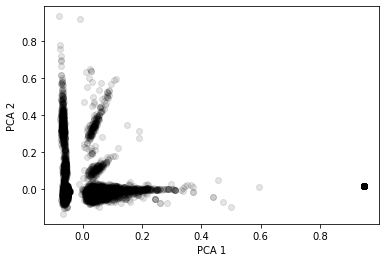

In [16]:
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

### K-Means Clustering on the transformed data 

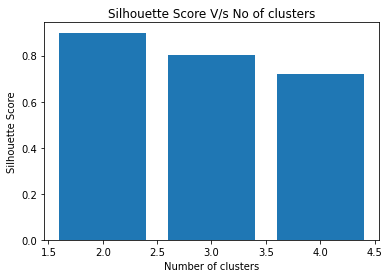

In [17]:
## Kmeans for  K (2,3,4)
sscore = []
for i in range(2,5):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_pca)
    sscore.append(silhouette_score(X_pca, kmeans.fit_predict(X_pca)))
plt.bar(range(2,5),sscore)
plt.title('Silhouette Score V/s No of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
#plt.savefig('elbow.png')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.8996485159035515
For n_clusters = 3 The average silhouette_score is : 0.8034519471507665
For n_clusters = 4 The average silhouette_score is : 0.7210174079576614


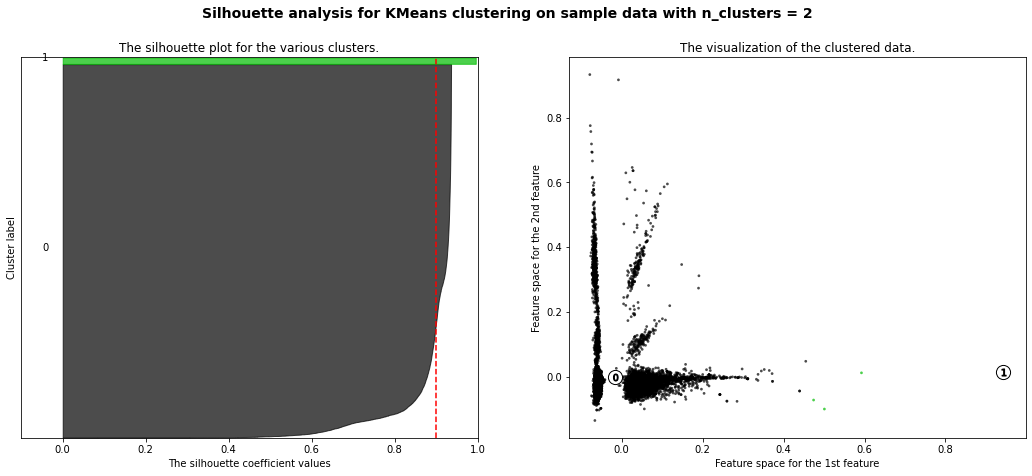

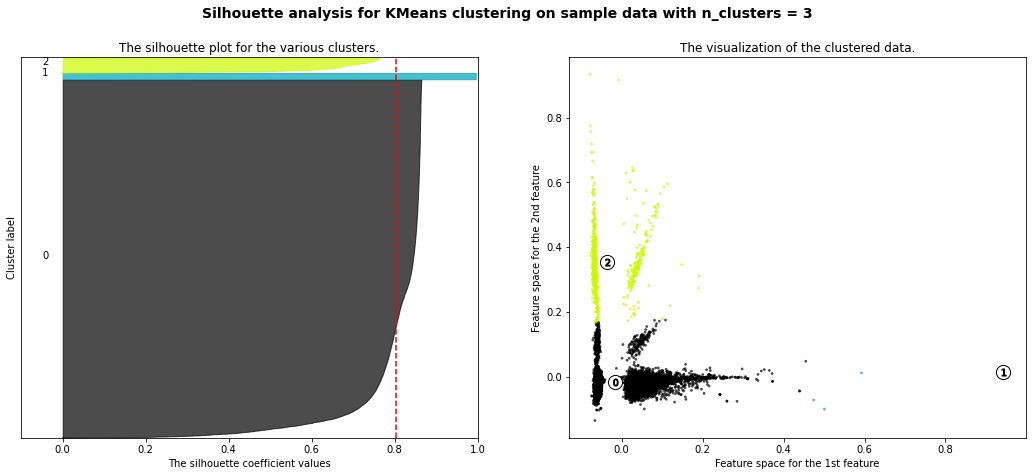

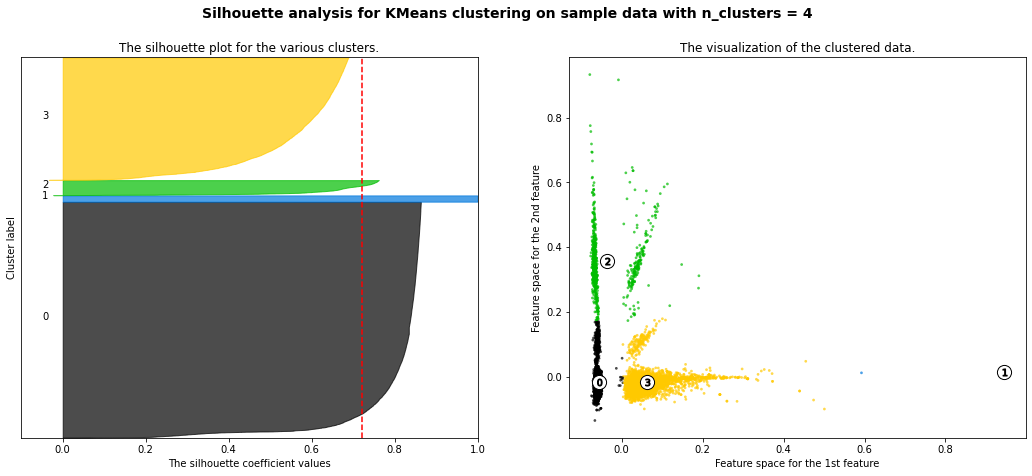

In [18]:
import matplotlib.cm as cm
from matplotlib.colors import colorConverter
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10,init='k-means++',max_iter=300,n_init=10)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [19]:
def cluster_plot(model):
    plt.figure(figsize = (10,5))
    sns.scatterplot(X_pca[:,0], X_pca[:,1], 
                hue=model.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (2) Derived from Original Dataset', fontsize=15)
    plt.legend()
    plt.ylabel('PC2')
    plt.xlabel('PC1')
    plt.show()

In [20]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs



C:\Users\pratishtha.kapoor\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


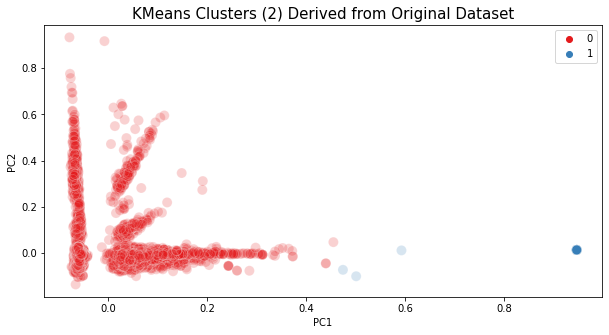

In [21]:
# checking the data for K =2 
kmeans_2 = KMeans(n_clusters = 2, n_init=100, max_iter=400, init='k-means++', random_state=10) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans_2.fit(X_pca)
y_pred = kmeans_2.predict(X_pca)
cluster_plot(kmeans_2)
dfs = get_top_features_cluster(tf_idf_array, y_pred, 15)

C:\Users\pratishtha.kapoor\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


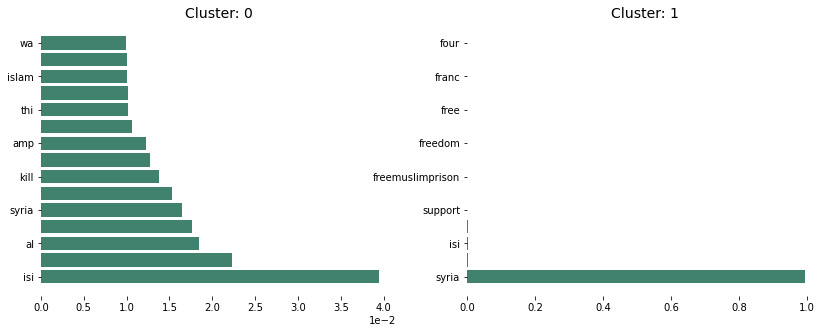

In [22]:
def plot_features(dfs):
    fig = plt.figure(figsize=(14,5))
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.set_title("Cluster: "+ str(i), fontsize = 14)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#40826d')
        yticks = ax.set_yticklabels(df.features)
    plt.show();
plot_features(dfs)

C:\Users\pratishtha.kapoor\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


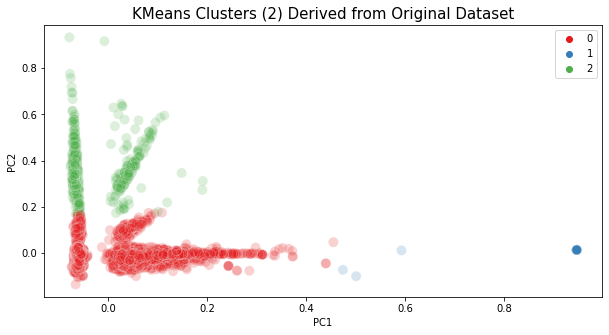

In [23]:
# checking the data for K =3
kmeans_3 = KMeans(n_clusters = 3, n_init=100, max_iter=400, init='k-means++', random_state=10) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans_3.fit(X_pca)
y_pred_3 = kmeans_3.predict(X_pca)
cluster_plot(kmeans_3)
dfs_3 = get_top_features_cluster(tf_idf_array, y_pred_3, 15)

C:\Users\pratishtha.kapoor\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


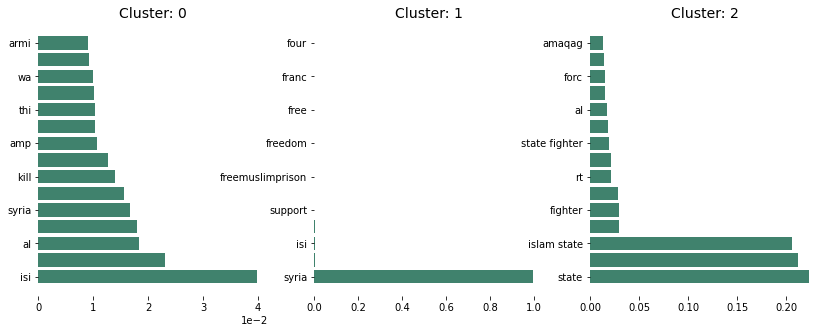

In [24]:
plot_features(dfs_3)

C:\Users\pratishtha.kapoor\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


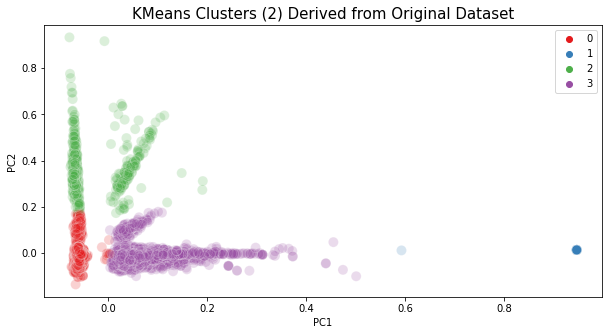

In [25]:
# checking the data for K =4
kmeans_4 = KMeans(n_clusters = 4, n_init=100, max_iter=400, init='k-means++', random_state=10) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans_4.fit(X_pca)
y_pred_4 = kmeans_4.predict(X_pca)
cluster_plot(kmeans_4)
dfs_4 = get_top_features_cluster(tf_idf_array, y_pred_4, 15)

C:\Users\pratishtha.kapoor\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


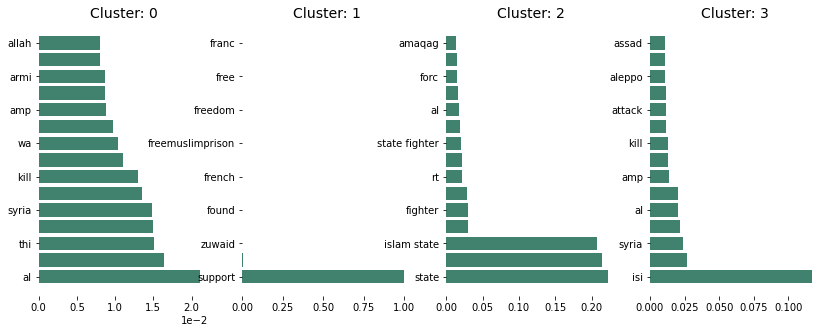

In [26]:
plot_features(dfs_4)

In [223]:
temp = df[~(df.clean_tweets == '')]
temp['labels'] = kmeans_4.labels_

C:\Users\pratishtha.kapoor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [233]:
temp.labels.value_counts()

0    10388
3     5394
2      663
1      279
Name: labels, dtype: int64

## Association Rule Mining

In [ ]:
#!pip install mlxtend
#!pip install apyori

In [356]:
#from mlxtend.preprocessing import TransactionEncoder
#from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from apyori import apriori

In [340]:
temp_text = temp.loc[temp.labels==2]

In [341]:
temp_text['tokens'] = [i.split(" ") for i in temp_text.clean_tweets]

C:\Users\pratishtha.kapoor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [342]:
df_cp = temp_text[['name', 'tokens']]

In [343]:
df2 = df_cp.groupby('name').agg(lambda x: nltk.FreqDist([w for wordlist in df_cp.tokens for w in wordlist if len(w)> 2]))

In [344]:
df2.head()

,tokens
name,
$QU4D,"{'islam': 705, 'translat': 1, 'either': 2, 'br..."
Abdul05,"{'islam': 705, 'translat': 1, 'either': 2, 'br..."
Abdus Mujahid,"{'islam': 705, 'translat': 1, 'either': 2, 'br..."
Abu Ayisha,"{'islam': 705, 'translat': 1, 'either': 2, 'br..."
Abu Humayra,"{'islam': 705, 'translat': 1, 'either': 2, 'br..."


In [345]:
basket_sets = df2['tokens'].apply(pd.Series).fillna(0).astype(int)

In [346]:
# te = TransactionEncoder()
# te_array = te.fit(tfidf_df).transform(tfidf_df)
# tedf = pd.DataFrame(te_array, columns=te.columns_)

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket_sets.applymap(encode_units)

In [347]:
basket_sets.shape

(94, 1947)

In [348]:
frequent_itemsets_ap = apriori(temp_text.tokens, min_support = 0.1, 
                               min_confidence = 0.2, min_length = 2)

In [349]:
rules_ap = list(frequent_itemsets_ap)

In [350]:
len(rules_ap)

10

In [354]:
#Visualizing the list of rules
#results = list(rule_list)
for i in rules_ap:
    print('\n')
    print(i)
    print('**********') 



RelationRecord(items=frozenset({'islam'}), support=0.9819004524886877, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'islam'}), confidence=0.9819004524886877, lift=1.0)])
**********


RelationRecord(items=frozenset({'rt'}), support=0.27450980392156865, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'rt'}), confidence=0.27450980392156865, lift=1.0)])
**********


RelationRecord(items=frozenset({'state'}), support=0.9230769230769231, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'state'}), confidence=0.9230769230769231, lift=1.0)])
**********


RelationRecord(items=frozenset({'islam', 'fighter'}), support=0.13423831070889894, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fighter'}), items_add=frozenset({'islam'}), confidence=1.0, lift=1.0184331797235024)])
**********


RelationRecord(items=frozenset({'state', 'fighter'}), support=0.13273001508295626, ordered_statisti

In [355]:
## plotting 

# Draw a line graph with Y-axis as number of association rules of minimum length 2, and X-axis as confidence percentage 
# (ranging from 0%, 10%, 20%, ...., 100%).
# Plot different colored lines for different support percentage (take values as 10%, 20%, and 50%) 

[RelationRecord(items=frozenset({'islam'}), support=0.9819004524886877, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'islam'}), confidence=0.9819004524886877, lift=1.0)]),
 RelationRecord(items=frozenset({'rt'}), support=0.27450980392156865, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'rt'}), confidence=0.27450980392156865, lift=1.0)]),
 RelationRecord(items=frozenset({'state'}), support=0.9230769230769231, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'state'}), confidence=0.9230769230769231, lift=1.0)]),
 RelationRecord(items=frozenset({'islam', 'fighter'}), support=0.13423831070889894, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fighter'}), items_add=frozenset({'islam'}), confidence=1.0, lift=1.0184331797235024)]),
 RelationRecord(items=frozenset({'state', 'fighter'}), support=0.13273001508295626, ordered_statistics=[OrderedStatistic(items_base=frozenset({'f